In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Univariate Analysis

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
gender = le.fit_transform(df['Gender'])

In [ ]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [ ]:
pd.Series(gender).value_counts()

1    5457
0    4543
dtype: int64

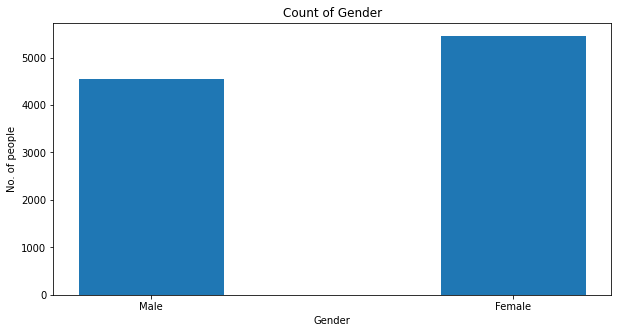

In [ ]:
x = ['Male','Female']
y = [4543 , 5457]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y,
        width = 0.4)
 
plt.xlabel("Gender")
plt.ylabel("No. of people")
plt.title("Count of Gender")
plt.show()

In [ ]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

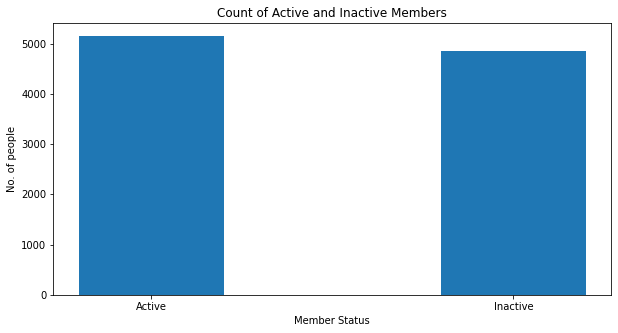

In [ ]:
x = ['Active','Inactive']
y = [5151 , 4849]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y,
        width = 0.4)
 
plt.xlabel("Member Status")
plt.ylabel("No. of people")
plt.title("Count of Active and Inactive Members")
plt.show()

In [ ]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

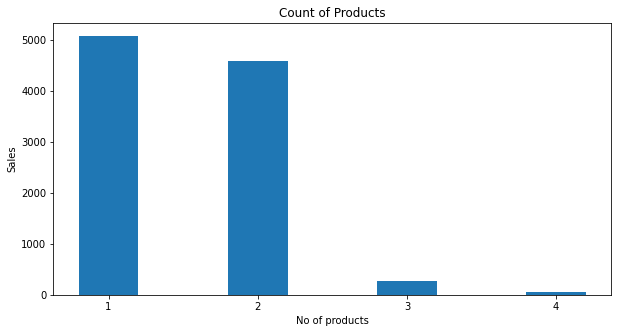

In [ ]:
x = ['1','2','3','4']
y = [5084 ,4590, 266, 60 ]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y,
        width = 0.4)
 
plt.xlabel("No of products")
plt.ylabel("Sales")#??
plt.title("Count of Products")#??
plt.show()

In [ ]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

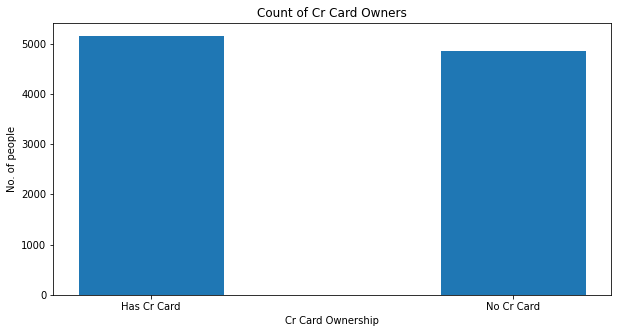

In [ ]:
x = ['Has Cr Card','No Cr Card']
y = [5151 , 4849]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y,
        width = 0.4)
 
plt.xlabel("Cr Card Ownership")
plt.ylabel("No. of people")
plt.title("Count of Cr Card Owners")
plt.show()

In [ ]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

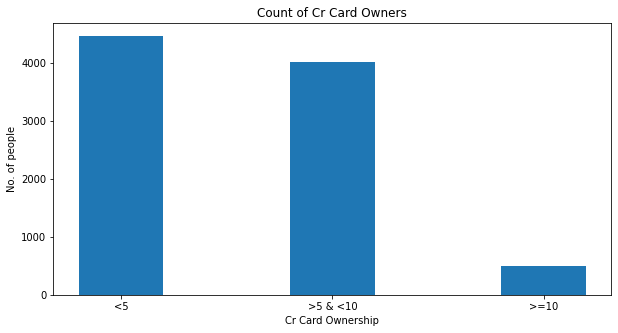

In [ ]:
x = ['<5','>5 & <10', '>=10']
y = [1035+413+1009+989+1012 , 967+1028+1025+984, 490]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y,
        width = 0.4)
 
plt.xlabel("Cr Card Ownership")
plt.ylabel("No. of people")
plt.title("Count of Cr Card Owners")
plt.show()

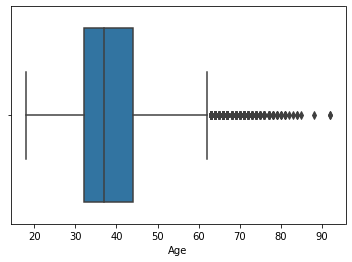

In [ ]:
import seaborn as sns

sns.boxplot(x=df['Age'])


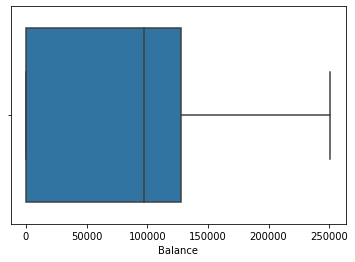

In [ ]:
sns.boxplot(x=df['Balance'])

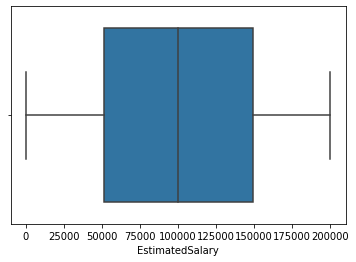

In [ ]:
sns.boxplot(x=df['EstimatedSalary'])

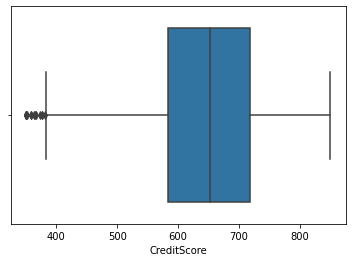

In [ ]:
sns.boxplot(x=df['CreditScore'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
geo = le.fit_transform(df['Geography'])

In [ ]:
pd.Series(geo).value_counts()

0    5014
1    2509
2    2477
dtype: int64

In [ ]:
le.classes_

array(['France', 'Germany', 'Spain'], dtype=object)

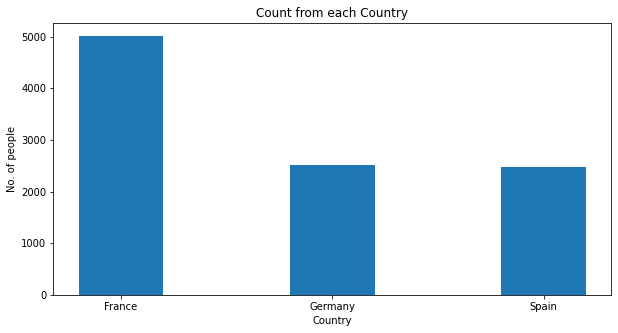

In [ ]:
x = ['France','Germany', 'Spain']
y = [5014 , 2509, 2477]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y,
        width = 0.4)
 
plt.xlabel("Country")
plt.ylabel("No. of people")
plt.title("Count from each Country")
plt.show()

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

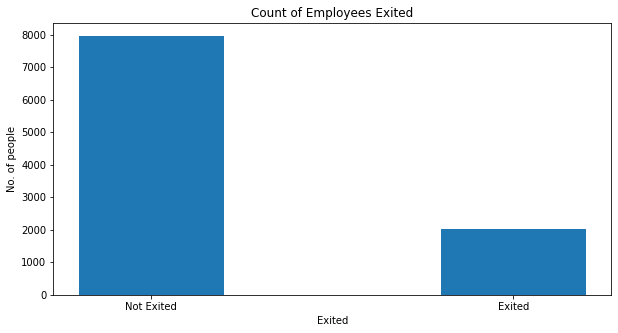

In [ ]:
x = ['Not Exited','Exited']
y = [7963 , 2037]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y,
        width = 0.4)
 
plt.xlabel("Exited")
plt.ylabel("No. of people")
plt.title("Count of Employees Exited")
plt.show()

# Bivariate Analysis

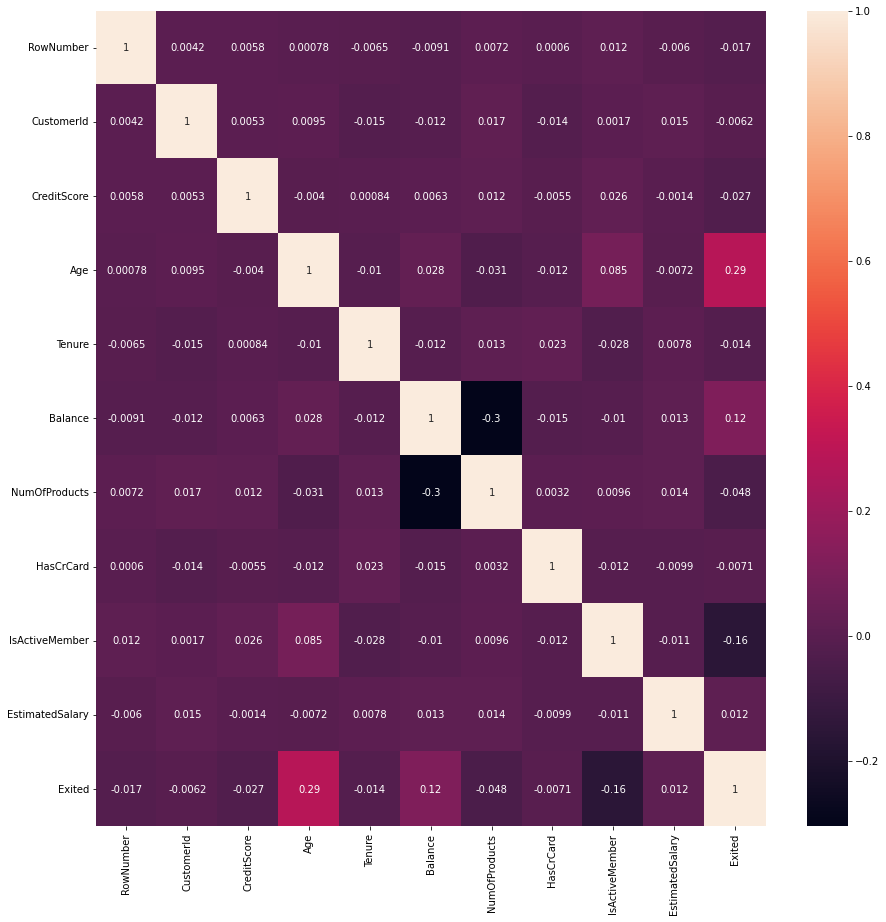

In [52]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True)

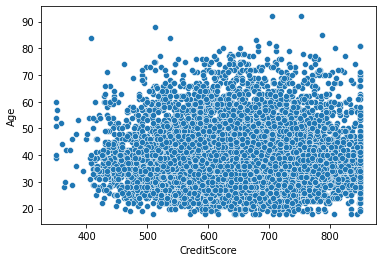

In [53]:
sns.scatterplot(x = 'CreditScore',y ='EstimatedSalary',data = df)

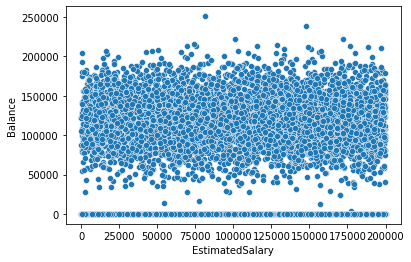

In [62]:
sns.scatterplot(x = 'EstimatedSalary',y ='Balance',data = df)

# Multivariate Analysis

In [64]:
from sklearn.feature_selection import f_classif

In [75]:
from mpl_toolkits import mplot3d

In [73]:
f_stat,p_val = f_classif(X,y)

In [74]:
#ANOVA F SCORE
f_stat

array([7.34452216e+00, 1.29330843e+01, 1.14727989e+02, 8.86063275e+02,
       1.96016363e+00, 1.42473832e+02, 2.29152225e+01, 5.09401035e-01,
       2.49800794e+02, 1.46326192e+00])

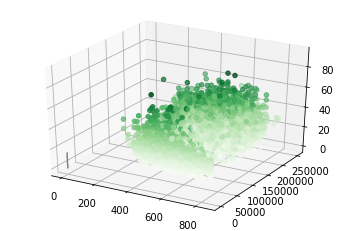

In [77]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = np.array(df['Age'])
xdata = np.array(df['CreditScore'])
ydata = np.array(df['Balance'])
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

# preparation for training

In [65]:
X = df.drop(['RowNumber', 'CustomerId', 'Surname','Exited'],axis=1)
y=df['Exited']

In [66]:
X['Gender'] = gender

In [67]:
X['Geography'] = geo

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(X))

In [69]:
X1.columns=X.columns

In [70]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
 X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33, random_state=42)